# Ridge, Lasso and ElasticNet Regression Model Building
## Importing the libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading the dataset

In [2]:
df=pd.read_csv("Dataset\Dataset_cl.csv")

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\santh\AppData\Local\Temp\ipykernel_4032\4074307184.py:1: SyntaxWarning: invalid escape sequence '\D'
  df=pd.read_csv("Dataset\Dataset_cl.csv")


In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0


In [4]:
## Dropping the unwanted columns
df.drop(columns=['day','month','year'],inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    int64  
 11  Region       243 non-null    float64
dtypes: float64(8), int64(4)
memory usage: 22.9 KB


In [6]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

## Seperation of dependent and independent features

In [7]:
X=df.drop("FWI",axis=1)
X
Y=df['FWI']
Y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

## Train test split

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

## Feature selection based on correlation

In [9]:
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

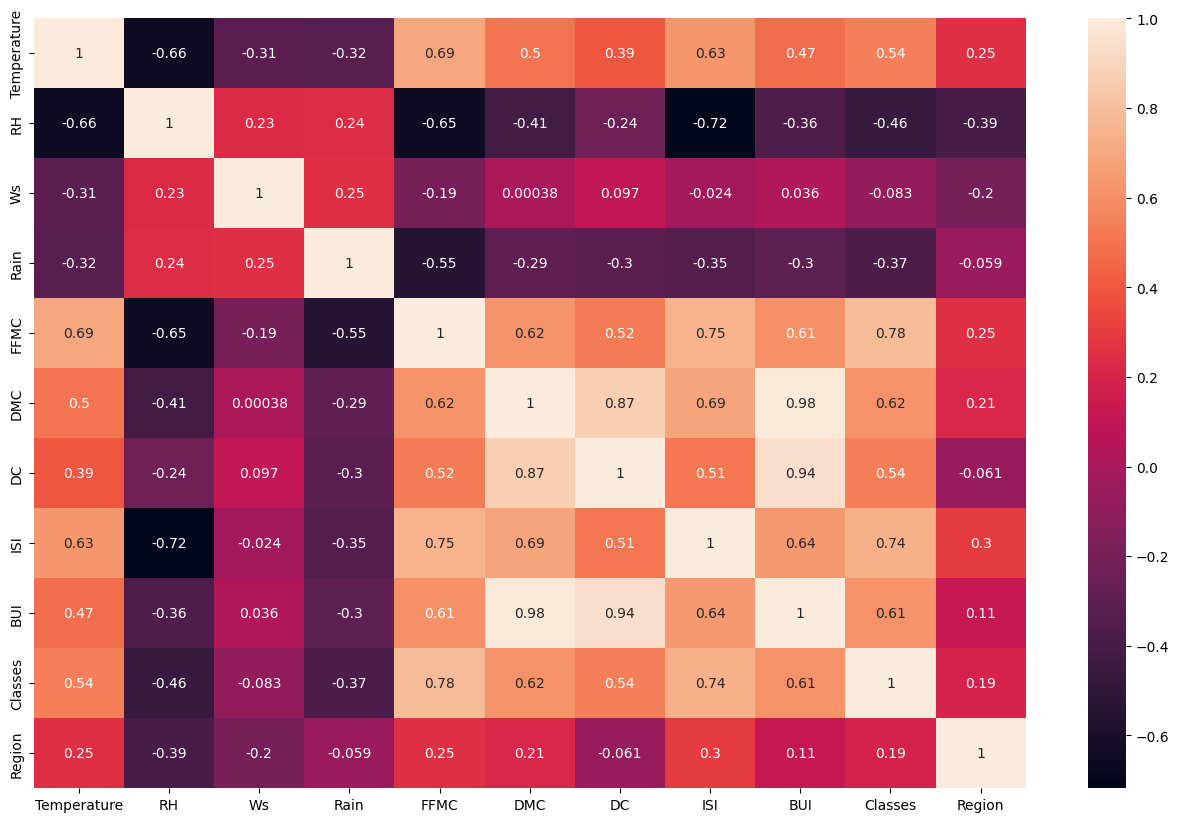

In [10]:
plt.figure(figsize=(16,10))
sns.heatmap(x_train.corr(),annot=True)

In [11]:
## Function for identifing highly correlated column
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs (corr_matrix.iloc[i,j])>threshold:
                col_name=corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr


In [12]:
## setting threshold
correlation_high=correlation(x_train,0.85)
correlation_high

{'BUI', 'DC'}

In [13]:
## Dropping the highly correlated column
x_train.drop(correlation_high,axis=1,inplace=True)
x_test.drop(correlation_high,axis=1,inplace=True)

## Standardisation

In [14]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
x_train_Scaled=Scaler.fit_transform(x_train)
x_test_Scaled=Scaler.transform(x_test)

Text(0.5, 1.0, 'Box plot After Standardizaton')

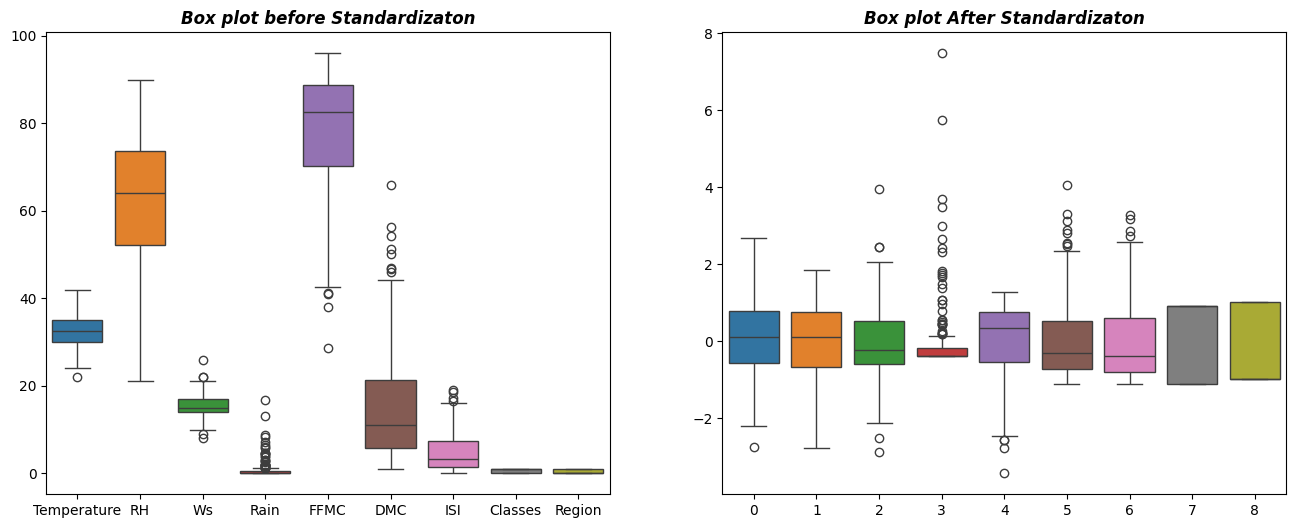

In [15]:
## Visualizing the standardised and Non standardized dataset
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title("Box plot before Standardizaton",weight='bold',style='italic')
sns.boxplot(x_train)
plt.subplot(1,2,2)
sns.boxplot(x_train_Scaled)
plt.title("Box plot After Standardizaton",weight='bold',style='italic')

## Linear Regression

The mean squared error of the linear regression model is: 0.674276687379158
The mean absolute error of the linear regression model is: 0.5468236465249978
The root mean squared error of the linear regression model is: 0.8211435242265253
The R2 Score of the linear regression model is: 0.9847657384266951


Text(0, 0.5, 'y_pred_lnreg')

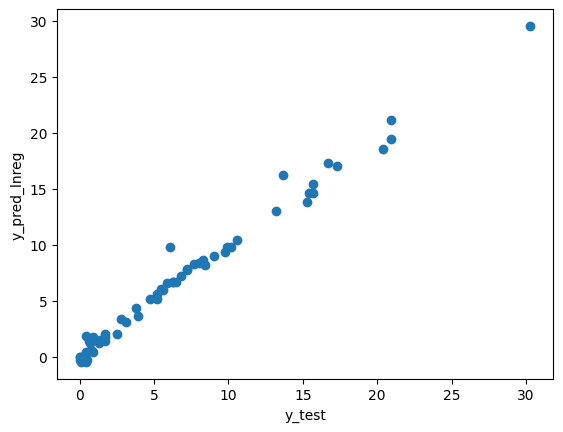

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
lnreg=LinearRegression()
lnreg.fit(x_train_Scaled,y_train)
y_pred_lnreg=lnreg.predict(x_test_Scaled)
mae_lnreg=mean_absolute_error(y_test,y_pred_lnreg)
mse_lnreg=mean_squared_error(y_test,y_pred_lnreg)
r2__score_lnreg=r2_score(y_test,y_pred_lnreg)
rmse_lnreg=np.sqrt(mse_lnreg)
print("The mean squared error of the linear regression model is:",mse_lnreg)
print("The mean absolute error of the linear regression model is:",mae_lnreg)
print("The root mean squared error of the linear regression model is:",rmse_lnreg)
print("The R2 Score of the linear regression model is:",r2__score_lnreg)
plt.scatter(y_test,y_pred_lnreg)
plt.xlabel("y_test")
plt.ylabel("y_pred_lnreg")

## Ridge Regression

The mean squared error of the Ridge regression model is: 0.6949198918152096
The mean absolute error of the Ridge regression model is: 0.5642305340105715
The root mean squared error of the Ridge regression model is: 0.8336185529456561
The R2 Score of the Ridge regression model is: 0.9842993364555512


Text(0, 0.5, 'y_pred_Ridge')

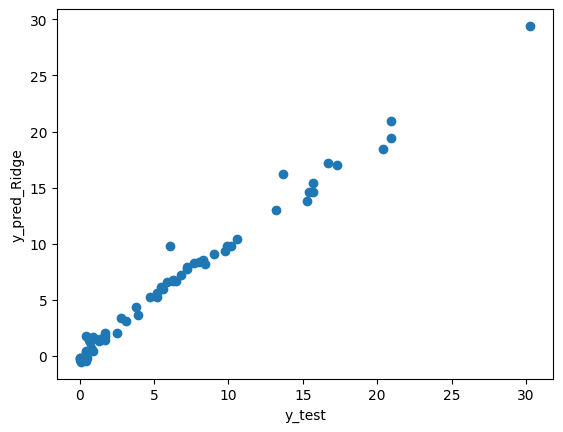

In [17]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
Ridge_reg=Ridge()
Ridge_reg.fit(x_train_Scaled,y_train)
y_pred_ridge=Ridge_reg.predict(x_test_Scaled)
mae_ridge=mean_absolute_error(y_test,y_pred_ridge)
mse_ridge=mean_squared_error(y_test,y_pred_ridge)
r2__score_ridge=r2_score(y_test,y_pred_ridge)
rmse_ridge=np.sqrt(mse_ridge)
print("The mean squared error of the Ridge regression model is:",mse_ridge)
print("The mean absolute error of the Ridge regression model is:",mae_ridge)
print("The root mean squared error of the Ridge regression model is:",rmse_ridge)
print("The R2 Score of the Ridge regression model is:",r2__score_ridge)
plt.scatter(y_test,y_pred_ridge)
plt.xlabel("y_test")
plt.ylabel("y_pred_Ridge")

### Ridge Regression cross validation

The mean squared error of the Ridge CV model is: 0.6949198918152096
The mean absolute error of the Ridge CV model is: 0.5642305340105715
The root mean squared error of the Ridge CV model is: 0.8336185529456561
The R2 Score of the Ridge CV model is: 0.9842993364555512


Text(0, 0.5, 'y_pred_Ridge_cv')

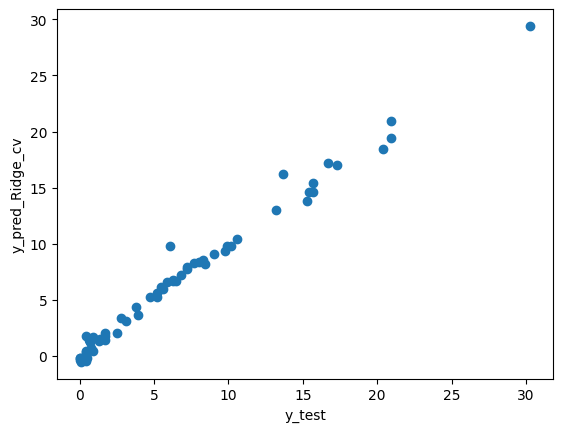

In [18]:
from sklearn.linear_model import RidgeCV
Ridge_cv=RidgeCV(cv=5)
Ridge_cv.fit(x_train_Scaled,y_train)
y_pred_Ridge_cv=Ridge_cv.predict(x_test_Scaled)
mae_Ridge_cv=mean_absolute_error(y_test,y_pred_Ridge_cv)
mse_Ridge_cv=mean_squared_error(y_test,y_pred_Ridge_cv)
r2__score_Ridge_cv=r2_score(y_test,y_pred_Ridge_cv)
rmse_Ridge_cv=np.sqrt(mse_Ridge_cv)
print("The mean squared error of the Ridge CV model is:",mse_Ridge_cv)
print("The mean absolute error of the Ridge CV model is:",mae_Ridge_cv)
print("The root mean squared error of the Ridge CV model is:",rmse_Ridge_cv)
print("The R2 Score of the Ridge CV model is:",r2__score_Ridge_cv)
plt.scatter(y_test,y_pred_Ridge_cv)
plt.xlabel("y_test")
plt.ylabel("y_pred_Ridge_cv")

## Lasso Regression

The mean squared error of the Lasso regression model is: 2.2483458918974772
The mean absolute error of the Lasso regression model is: 1.133175994914409
The root mean squared error of the Lasso regression model is: 1.4994485292591664
The R2 Score of the Lasso regression model is: 0.9492020263112388


Text(0, 0.5, 'y_pred_lasso')

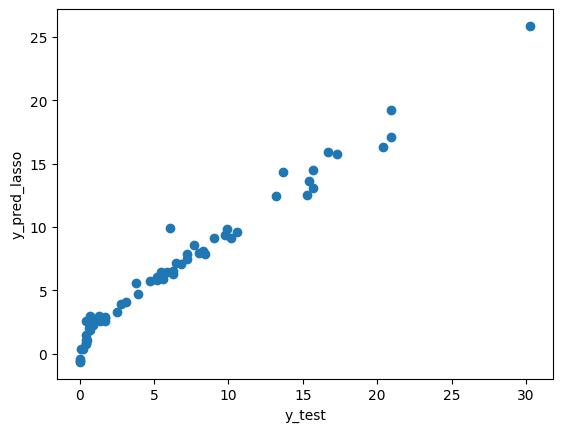

In [19]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
Lasso_reg=Lasso()
Lasso_reg.fit(x_train_Scaled,y_train)
y_pred_Lasso=Lasso_reg.predict(x_test_Scaled)
mae_Lasso=mean_absolute_error(y_test,y_pred_Lasso)
mse_Lasso=mean_squared_error(y_test,y_pred_Lasso)
r2__score_Lasso=r2_score(y_test,y_pred_Lasso)
rmse_Lasso=np.sqrt(mse_Lasso)
print("The mean squared error of the Lasso regression model is:",mse_Lasso)
print("The mean absolute error of the Lasso regression model is:",mae_Lasso)
print("The root mean squared error of the Lasso regression model is:",rmse_Lasso)
print("The R2 Score of the Lasso regression model is:",r2__score_Lasso)
plt.scatter(y_test,y_pred_Lasso)
plt.xlabel("y_test")
plt.ylabel("y_pred_lasso")

### Lasso Regression Cross Validation

The mean squared error of the Lasso CV model is: 0.792499555474362
The mean absolute error of the Lasso CV model is: 0.619970115826343
The root mean squared error of the Lasso CV model is: 0.8902244410677355
The R2 Score of the Lasso CV model is: 0.9820946715928275


Text(0, 0.5, 'y_pred_lasso_cv')

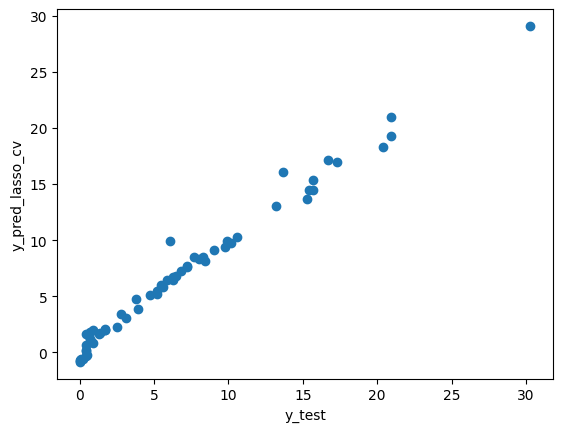

In [20]:
from sklearn.linear_model import LassoCV
lasso_cv=LassoCV(cv=5)
lasso_cv.fit(x_train_Scaled,y_train)
y_pred_lasso_cv=lasso_cv.predict(x_test_Scaled)
mae_Lasso_cv=mean_absolute_error(y_test,y_pred_lasso_cv)
mse_Lasso_cv=mean_squared_error(y_test,y_pred_lasso_cv)
r2__score_Lasso_cv=r2_score(y_test,y_pred_lasso_cv)
rmse_Lasso_cv=np.sqrt(mse_Lasso_cv)
print("The mean squared error of the Lasso CV model is:",mse_Lasso_cv)
print("The mean absolute error of the Lasso CV model is:",mae_Lasso_cv)
print("The root mean squared error of the Lasso CV model is:",rmse_Lasso_cv)
print("The R2 Score of the Lasso CV model is:",r2__score_Lasso_cv)
plt.scatter(y_test,y_pred_lasso_cv)
plt.xlabel("y_test")
plt.ylabel("y_pred_lasso_cv")

## Elastic Net Regression

The mean squared error of the Lasso regression model is: 5.5172511010252245
The mean absolute error of the Lasso regression model is: 1.8822353634896005
The root mean squared error of the Lasso regression model is: 2.3488829474933874
The R2 Score of the Lasso regression model is: 0.8753460589519703


Text(0, 0.5, 'y_pred_ElasticNet')

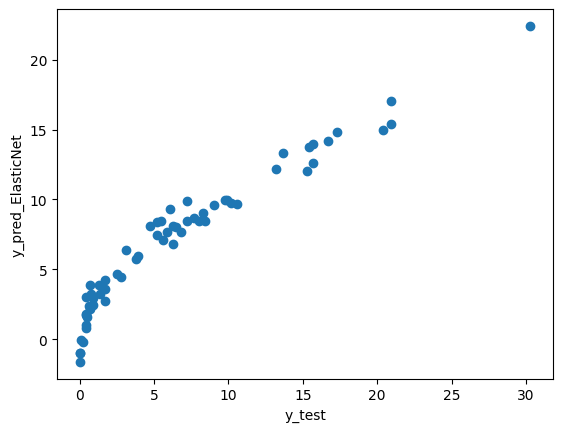

In [21]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
ElasticNet_reg=ElasticNet()
ElasticNet_reg.fit(x_train_Scaled,y_train)
y_pred_ElasticNet=ElasticNet_reg.predict(x_test_Scaled)
mae_ElasticNet=mean_absolute_error(y_test,y_pred_ElasticNet)
mse_ElasticNet=mean_squared_error(y_test,y_pred_ElasticNet)
r2__score_ElasticNet=r2_score(y_test,y_pred_ElasticNet)
rmse_ElasticNet=np.sqrt(mse_ElasticNet)
print("The mean squared error of the Lasso regression model is:",mse_ElasticNet)
print("The mean absolute error of the Lasso regression model is:",mae_ElasticNet)
print("The root mean squared error of the Lasso regression model is:",rmse_ElasticNet)
print("The R2 Score of the Lasso regression model is:",r2__score_ElasticNet)
plt.scatter(y_test,y_pred_ElasticNet)
plt.xlabel("y_test")
plt.ylabel("y_pred_ElasticNet")

### ElasticNet Cross Validation

The mean squared error of the ElasticNet CV model is: 0.8222830416276258
The mean absolute error of the ElasticNet CV model is: 0.6575946731430898
The root mean squared error of the ElasticNet CV model is: 0.906798236449336
The R2 Score of the ElasticNet CV model is: 0.9814217587854941


Text(0, 0.5, 'y_pred_ElasticNet_cv')

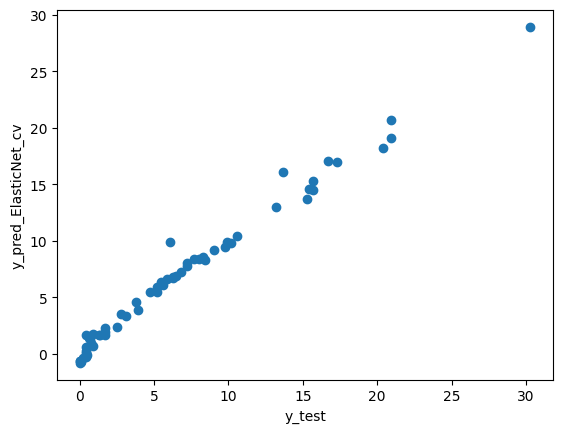

In [22]:
from sklearn.linear_model import ElasticNetCV
ElasticNet_cv=ElasticNetCV(cv=5)
ElasticNet_cv.fit(x_train_Scaled,y_train)
y_pred_ElasticNet_cv=ElasticNet_cv.predict(x_test_Scaled)
mae_ElasticNet_cv=mean_absolute_error(y_test,y_pred_ElasticNet_cv)
mse_ElasticNet_cv=mean_squared_error(y_test,y_pred_ElasticNet_cv)
r2__score_ElasticNet_cv=r2_score(y_test,y_pred_ElasticNet_cv)
rmse_ElasticNet_cv=np.sqrt(mse_ElasticNet_cv)
print("The mean squared error of the ElasticNet CV model is:",mse_ElasticNet_cv)
print("The mean absolute error of the ElasticNet CV model is:",mae_ElasticNet_cv)
print("The root mean squared error of the ElasticNet CV model is:",rmse_ElasticNet_cv)
print("The R2 Score of the ElasticNet CV model is:",r2__score_ElasticNet_cv)
plt.scatter(y_test,y_pred_ElasticNet_cv)
plt.xlabel("y_test")
plt.ylabel("y_pred_ElasticNet_cv")